# Bài tập về nhà Decision Tree, Random Forest


- Thực hiện các yêu cầu dưới đây với tập dữ liệu Australian credit
- Down dữ liệu tại đường link dưới đây và đặt vào folder /data
 
  https://archive.ics.uci.edu/ml/datasets/Statlog+(Australian+Credit+Approval)
    

In [51]:
# import packages,...
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import warnings; warnings.filterwarnings(action='once')
import random
import math
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

%matplotlib inline

# set random_state = 0
random_state = 0


## 1. Tìm hiểu dữ liệu

In [2]:
'''
- Tìm hiểu cấu trúc data tại trang web UCI
- Down các files, đặt trong folder data/
- Chú ý:
    - Đọc mô tả dữ liệu trong file 'australian.doc'
    - Kiểm tra DecisionTree/RandomForest của Sklearn có hỗ trợ với kiểu dữ liệu được cung cấp không
'''
data_path = 'australian.dat'

Dữ liệu này rất phù hợp để sử dụng Decision Tree vì:

Có sự kết hợp tốt giữa các thuộc tính phân loại và liên tục.
Decision Tree xử lý dữ liệu thiếu và phân loại nhị phân rất hiệu quả.
Tính cân bằng giữa các lớp và khả năng giải thích là một lợi thế trong bài toán này.

In [3]:
titles = ['A1', 'A2','A3','A4','A5','A6','A7','A8','A9','A10','A11','A12','A13','A14','Class attribute']
df = pd.read_csv('australian.dat', header= None, names= titles, sep=' ')
print(df)

     A1     A2      A3  A4  A5  A6     A7  A8  A9  A10  A11  A12  A13   A14  \
0     1  22.08  11.460   2   4   4  1.585   0   0    0    1    2  100  1213   
1     0  22.67   7.000   2   8   4  0.165   0   0    0    0    2  160     1   
2     0  29.58   1.750   1   4   4  1.250   0   0    0    1    2  280     1   
3     0  21.67  11.500   1   5   3  0.000   1   1   11    1    2    0     1   
4     1  20.17   8.170   2   6   4  1.960   1   1   14    0    2   60   159   
..   ..    ...     ...  ..  ..  ..    ...  ..  ..  ...  ...  ...  ...   ...   
685   1  31.57  10.500   2  14   4  6.500   1   0    0    0    2    0     1   
686   1  20.67   0.415   2   8   4  0.125   0   0    0    0    2    0    45   
687   0  18.83   9.540   2   6   4  0.085   1   0    0    0    2  100     1   
688   0  27.42  14.500   2  14   8  3.085   1   1    1    0    2  120    12   
689   1  41.00   0.040   2  10   4  0.040   0   1    1    0    1  560     1   

     Class attribute  
0                  0  
1    

In [4]:
df.head()

A1     A2     A3  A4  A5  A6     A7  A8  A9  A10  A11  A12  A13   A14  \
0   1  22.08  11.46   2   4   4  1.585   0   0    0    1    2  100  1213   
1   0  22.67   7.00   2   8   4  0.165   0   0    0    0    2  160     1   
2   0  29.58   1.75   1   4   4  1.250   0   0    0    1    2  280     1   
3   0  21.67  11.50   1   5   3  0.000   1   1   11    1    2    0     1   
4   1  20.17   8.17   2   6   4  1.960   1   1   14    0    2   60   159   

   Class attribute  
0                0  
1                0  
2                0  
3                1  
4                1

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   A1               690 non-null    int64  
 1   A2               690 non-null    float64
 2   A3               690 non-null    float64
 3   A4               690 non-null    int64  
 4   A5               690 non-null    int64  
 5   A6               690 non-null    int64  
 6   A7               690 non-null    float64
 7   A8               690 non-null    int64  
 8   A9               690 non-null    int64  
 9   A10              690 non-null    int64  
 10  A11              690 non-null    int64  
 11  A12              690 non-null    int64  
 12  A13              690 non-null    int64  
 13  A14              690 non-null    int64  
 14  Class attribute  690 non-null    int64  
dtypes: float64(3), int64(12)
memory usage: 81.0 KB


In [19]:
df.shape()

     A1     A2      A3  A4  A5  A6     A7  A8  A9  A10  A11  A12  A13   A14  \
0     1  22.08  11.460   2   4   4  1.585   0   0    0    1    2  100  1213   
1     0  22.67   7.000   2   8   4  0.165   0   0    0    0    2  160     1   
2     0  29.58   1.750   1   4   4  1.250   0   0    0    1    2  280     1   
3     0  21.67  11.500   1   5   3  0.000   1   1   11    1    2    0     1   
4     1  20.17   8.170   2   6   4  1.960   1   1   14    0    2   60   159   
..   ..    ...     ...  ..  ..  ..    ...  ..  ..  ...  ...  ...  ...   ...   
685   1  31.57  10.500   2  14   4  6.500   1   0    0    0    2    0     1   
686   1  20.67   0.415   2   8   4  0.125   0   0    0    0    2    0    45   
687   0  18.83   9.540   2   6   4  0.085   1   0    0    0    2  100     1   
688   0  27.42  14.500   2  14   8  3.085   1   1    1    0    2  120    12   
689   1  41.00   0.040   2  10   4  0.040   0   1    1    0    1  560     1   

     Class attribute  
0                  0  
1    

In [6]:
df.shape[0]

690

In [7]:
df.shape[1]

15

In [8]:
df['Class attribute'].value_counts()

Class attribute
0    383
1    307
Name: count, dtype: int64

## 2. Decision Tree

### 2.1. Khảo sát các giá trị khác nhau của max_depth

`max_depth` là tham số giới hạn độ sâu tối đa của cây quyết định:
shallow tree -> underfitting
deep tree -> overfitting

In [18]:
#phan chia dau vao, dau ra, train - test
X, y = df.drop('Class attribute',axis= 1), df['Class attribute'] 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)
print(y_train)
print(X_train)

520    1
497    1
69     1
466    1
405    1
      ..
369    1
320    1
527    0
125    0
265    0
Name: Class attribute, Length: 552, dtype: int64
     A1     A2      A3  A4  A5  A6     A7  A8  A9  A10  A11  A12  A13    A14
520   1  42.08   1.040   2   9   4  5.000   1   1    6    1    2  500  10001
497   0  28.67   1.040   2   8   4  2.500   1   1    5    1    2  300   1431
69    1  27.25   1.585   2  13   8  1.835   1   1   12    1    2  583    714
466   0  65.17  14.000   2   1   1  0.000   1   1   11    1    2    0   1401
405   0  28.75   3.750   2   8   4  1.085   1   1    1    1    2  371      1
..   ..    ...     ...  ..  ..  ..    ...  ..  ..  ...  ...  ...  ...    ...
369   1  33.58   2.750   2   7   4  4.250   1   1    6    0    2  204      1
320   1  21.00   4.790   1   9   4  2.250   1   1    1    1    2   80    301
527   0  45.33   1.000   2  11   4  0.125   0   0    0    1    2  263      1
125   1  22.00   0.790   2   9   4  0.290   0   1    1    0    2  420    284
265  

In [58]:


# Đào tạo mô hình
model = DecisionTreeClassifier(random_state=10)
model.fit(X_train, y_train)

# Đánh giá mô hình trên tập huấn luyện
y_train_pred = model.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)  # So sánh y_train thực với y_train dự đoán
print(train_accuracy)

# Đánh giá mô hình trên tập kiểm thử
y_test_pred = model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)  # So sánh y_test thực với y_test dự đoán
print(test_accuracy)


1.0
0.7681159420289855


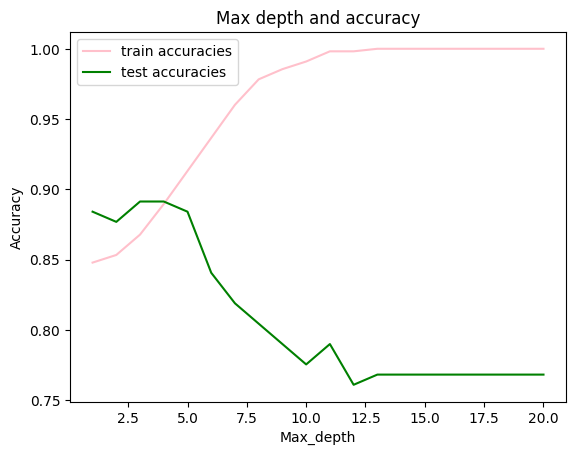

In [57]:
#so sanh do chinh xac dua vao max_depth
train_accuracies = []
test_accuracies = []
max_depth = range(1,21)
for depth in range(1, 21):
    model = DecisionTreeClassifier(max_depth= depth, random_state= 10)
    model.fit(X_train,y_train)

    y_train_pred = model.predict(X_train)
    train_accuracy = model.score(X_train, y_train)
    train_accuracies.append(train_accuracy)

    y_test_pred = model.predict(X_test)
    test_accuracy = model.score(X_test, y_test)
    test_accuracies.append(test_accuracy)

plt.figure() 
plt.plot(max_depth, train_accuracies, color='pink', linestyle='-', label='train accuracies')
plt.plot(max_depth, test_accuracies, color='green', linestyle='-', label='test accuracies')

# Thêm tiêu đề và nhãn cho trục x, y
plt.title('Max depth and accuracy')
plt.xlabel('Max_depth')
plt.ylabel('Accuracy')

# Thêm chú thích
plt.legend()

# Hiển thị biểu đồ
plt.show()


### 2.2. Tìm kiếm siêu tham số

In [41]:
#code
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': range(1,8), 
    'criterion': ['gini', 'entropy'],               
    'min_samples_split': range(1,11),        
    'min_samples_leaf': range(1,10)           
}

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring= 'accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

best_model = grid_search.best_estimator_
y_test_pred = best_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f"Test accuracy with best parameters: {test_accuracy:.4f}")

Best Parameters: {'criterion': 'gini', 'max_depth': 7, 'min_samples_leaf': 7, 'min_samples_split': 2}
Best Score: 0.8478624078624077


C:\Users\ADMIN\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
630 fits failed out of a total of 6300.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
630 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\ADMIN\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\ADMIN\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-

## 3. Random Forest

### 3.1 Khảo sát các giá trị khác nhau của n_estimators

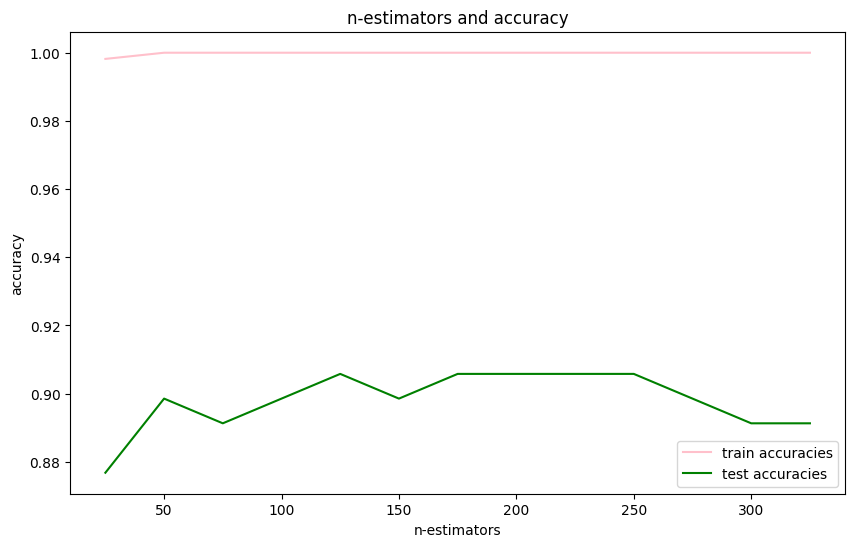

In [50]:
#code
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
#so sanh do chinh xac dua vao max_depth

train_accuracies_rf = []
test_accuracies_rf = []
n_estimator = range(25,350,25)
for n in n_estimator:
    rfmodel = RandomForestClassifier(n_estimators= n, random_state= 10)
    rfmodel.fit(X_train,y_train)

    y_train_pred_rf = rfmodel.predict(X_train)
    train_accuracy_rf = accuracy_score(y_train, y_train_pred_rf)
    train_accuracies_rf.append(train_accuracy_rf)

    y_test_pred_rf = rfmodel.predict(X_test)
    test_accuracy_rf = accuracy_score(y_test_pred_rf, y_test)
    test_accuracies_rf.append(test_accuracy_rf)

plt.figure(figsize=(10,6)) 
plt.plot(n_estimator, train_accuracies_rf, color='pink', linestyle='-', label='train accuracies')
plt.plot(n_estimator, test_accuracies_rf, color='green', linestyle='-', label='test accuracies')


plt.title('n-estimators and accuracy')
plt.xlabel('n-estimators')
plt.ylabel('accuracy')

plt.legend()

# Hiển thị biểu đồ
plt.show()




### 3.2 Tìm kiếm siêu tham số

In [61]:
# code
param_grid = {
    'n_estimators': [50,125,175,200,250], 
    'max_depth': [1, 5, 10],               
    'min_samples_split': [2, 4, 6, 8, 10],        
    'min_samples_leaf': [2, 4, 6]           
}
rfmodel = RandomForestClassifier(random_state= 10)
grid_search = GridSearchCV(estimator=rfmodel, param_grid=param_grid, cv=5, scoring= 'accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

best_model = grid_search.best_estimator_
y_test_pred = best_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f"Test accuracy with best parameters: {test_accuracy:.4f}")

Best Parameters: {'max_depth': 10, 'min_samples_leaf': 6, 'min_samples_split': 2, 'n_estimators': 50}
Best Score: 0.8695823095823096
Test accuracy with best parameters: 0.9275
